In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
#testing comment

In [2]:
#Functions
def ships(x):
    if x > 16000:
        return 4, 1
    elif 14000 < x <= 16000:
        return 4,0
    elif 13000 < x <= 14000:
        return 3,2
    elif 12000 < x <= 13000:
        return 3,1
    elif 10000 < x <= 12000:
        return 3,0
    elif 9000 < x <= 10000:
        return 2,2
    elif 8000 < x <= 9000:
        return 2,1
    elif 6000 < x <= 8000:
        return 2,0
    elif 5000 < x <= 6000:
        return 1,2
    elif 4000 < x <= 5000:
        return 1,1
    elif x < 4000:
        return 1, 0
    

In [5]:
# Set random seed for reproducibility
np.random.seed(42)

# Simulation settings
num_simulations = 100  # Monte Carlo simulations

# ✅ **Fixed Parameters (Hardcoded)**
minimum_daily_cruise_passengers = 5000
maximum_daily_cruise_passengers = 15000
minimum_daily_independent_tourist = 100
maximum_daily_independent_tourists = 1000

sales_tax_rate = 0.055  # 5.5% (Fixed)
head_tax_per_passenger = 10  # $10 per passenger (Fixed)
waste_cost_per_visitor = 2.25  # $2.25 per visitor (Fixed)
conservation_cost_per_visitor = 3  # $3 per visitor (Fixed)
cruise_profit_margin = 0.175  # 17.5% (Fixed)
B_tour = 0.60  # 60% of Local Revenue from Tourism

#P_peak = 1.35  # Peak season multiplier (Fixed)
#P_offpeak = 0.65  # Off-season multiplier (Fixed)
#E_elasticity = -0.5  # Demand drop with increased tax (Fixed)
#C_housing = 0.6  # Housing Market Impact (Fixed)

# Fixed Parameters for Environmental Calculations
Sm_Ship_Mult = 0.4
NoX_Large = 199283.8356
NoX_Small = NoX_Large * Sm_Ship_Mult

# Fixed Parameters for Impact Calcualtions             
#Portions of Time Spent for Cruise Passengers
never_leave = 0.1 # percentage that don't leave the ship
leave_ship = 1 - never_leave #percentage that leave the ship

#Cruise Passenger Activiy Breakdown
relaxing = 0.3 #percentage of time spent relaxing
onboard_dining = 0.09 #percentage of time spent dining onboard
activities = 0.35 #percentage of time spent on activities offboard
offboard_dining = 0.09 #percentage of time spent dining offboard
traveling = 0.12 #percentage of time spent traveling offboard
shopping = 0.05 #percentage of time spent shopping offboard

#Portions of Traveling Choices for Cruise Passengers
rental = 0.05 
taxi = 0.375
pubt = 0.375
walk = 0.2

#Non-Cruise Visitors Activity Breakdown (equivalently proportional to cruise)
ind_dining = 0.18 #percentage of time spent dining
ind_traveling = 0.12 #percentage of time spent traveling
ind_shopping = 0.05 #percentage of time spent shopping
ind_activities = 0.35 #percentage of time spent on activities
ind_relaxing = 0.3 #percentage of time spent relaxing in at place of stay

#Portions of Traveling Choices for Non-Cruise visitors
ind_rental = 0.30 #percentage of non-cruise visitors that rent 
ind_taxi = 0.40 #percentage of non-cruise visitors that taxi
ind_pubt = 0.25 #percentage of non-cruise visitors that use public tranport
ind_walk = 0.05 #percentage of non-cruise visitors that walk

# ✅ **Storage for Results**
#Profit Outputs
cbj_profits = []
local_business_profits = []
cruise_line_profits = []
optimal_passenger_counts = []

# Environmental Outputs
Ship_Count_Large = []
Ship_Count_Small = []
NoX_Level = []
NoX_Perc_Change = []
#Impact Outputs
#Counts
total_visitor_counts = []
ind_visitor_counts = []
cruise_visitor_counts = []
#Percentages
total_visitor_changes = []
ind_visitor_changes = []
cruise_visitor_changes = []
ind_makeup = []
cruise_makeup = []
#impact
traffic_impacts = []
bus_impacts = []
walking_impacts = []

# Monte Carlo Simulation Loop
for _ in range(num_simulations):
    cbj_profit = 0
    local_business_profit = 0
    cruise_line_profit = 0
    season_length = np.random.randint(120, 151)

    for day in range(season_length):
        # ✅ **normal distribution for cruise passengers**
        average_daily_cruise_passengers = int((maximum_daily_cruise_passengers + minimum_daily_cruise_passengers) / 2)
        daily_cruise_mu = average_daily_cruise_passengers
        optimal_daily_cruise_passengers = int((maximum_daily_cruise_passengers - average_daily_cruise_passengers) / 3) # within 3 standard deviations
        cruise_passengers = np.random.normal(loc=average_daily_cruise_passengers, scale=optimal_daily_cruise_passengers)

         # ✅ **normal distribution for independent tourists**
        average_daily_independent_tourists = int((maximum_daily_independent_tourists + minimum_daily_independent_tourist) / 2)
        daily_ind_mu = average_daily_independent_tourists
        optimal_daily_independent_tourists = int((maximum_daily_independent_tourists - average_daily_independent_tourists) / 3) # within 3 standard deviations
        independent_tourists = np.random.normal(loc=average_daily_independent_tourists, scale=optimal_daily_independent_tourists)


        # ✅ **Random Spending & Revenue for each day within the inner loop**
        spending_per_cruise_passenger = np.random.uniform(180, 250)  # Generate single value for this day
        spending_per_independent_tourist = np.random.uniform(250, 400)  # Generate single value for this day
        infrastructure_daily_cost = np.random.randint(10000, 30000)  # Generate single value for this day
        cruise_ticket_price = np.random.randint(1200, 1800)  # Generate single value for this day
        cruise_operating_cost_per_passenger_per_day = np.random.randint(100, 150)  # Generate single value for this day

        #Total spending
        cruise_spending = cruise_passengers * spending_per_cruise_passenger
        independent_spending = independent_tourists * spending_per_independent_tourist
        total_sales = cruise_spending + independent_spending

        # ✅ **Revenue from Taxes & Fees**
        sales_tax_revenue = total_sales * sales_tax_rate
        head_tax_revenue = cruise_passengers * head_tax_per_passenger

        # ✅ **CBJ Costs**
        waste_cost = (cruise_passengers + independent_tourists) * waste_cost_per_visitor
        conservation_cost = (cruise_passengers + independent_tourists) * conservation_cost_per_visitor

        # ✅ **Daily CBJ Profit Calculation**
        daily_cbj_profit = (
            sales_tax_revenue + head_tax_revenue - waste_cost - conservation_cost - infrastructure_daily_cost
        )
        cbj_profit += daily_cbj_profit

        # ✅ **Local Business Profit (Direct Visitor Spending)**
        local_business_profit += total_sales * B_tour

        # ✅ **Cruise Line Profit**
        ticket_revenue = cruise_passengers * cruise_ticket_price
        operating_cost = cruise_passengers * cruise_operating_cost_per_passenger_per_day
        daily_cruise_profit = (ticket_revenue - operating_cost) * cruise_profit_margin
        cruise_line_profit += daily_cruise_profit

        # Environmental Calculation
        Ships_Large, Ships_Small = ships(cruise_passengers)
        mu_Ships_Large, mu_Ships_Small = ships(average_daily_cruise_passengers)
        NoX_Total = NoX_Large * Ships_Large + NoX_Small * Ships_Small
        mu_NoX_Total = NoX_Large * mu_Ships_Large + NoX_Small * mu_Ships_Small
        
        NoX_Change = (NoX_Total / mu_NoX_Total)-1 #percent change relative to mean nox produced
        



        # Impact Calculations
        #Cruise Visitors in the City per Day
        visiting_cruise_passengers = leave_ship * cruise_passengers #Number of cruise passengers who leave the ship at port
        activity_cruise_passengers = activities * visiting_cruise_passengers  #Number of cruise passengers doing activities
        offboard_dining_cruise_passengers = offboard_dining * visiting_cruise_passengers  #Number of cruise passengers eating offboard
        traveling_cruise_passengers = traveling * visiting_cruise_passengers #Number of cruise passengers traveling the city
        shopping_cruise_passengers = shopping * visiting_cruise_passengers #Number of cruise passengers shopping in the city

        #Cruise visitors onboard per Day
        relaxing_cruise_passengers = relaxing * visiting_cruise_passengers #Number of cruise passengers onboard relaxing
        onboard_dining_cruise_passengers = onboard_dining * visiting_cruise_passengers  #Number of cruise passengers eating onboard
        total_onboard_passengers = relaxing_cruise_passengers + onboard_dining_cruise_passengers + (never_leave * cruise_passengers) 
        
        # Cruise Passenger Traveling calculations per Day
        rental_cruise_passengers = rental * traveling_cruise_passengers  #Of those who are traveling, this many rent a car
        taxi_cruise_passengers = taxi * traveling_cruise_passengers  #Of those who are traveling, this many use a taxi service
        public_transport_cruise_passengers = pubt * traveling_cruise_passengers  #Of those who are traveling, this many use public transportation
        walking_cruise_passengers = walk * traveling_cruise_passengers  #Of those who are traveling, this many walk from the ship

        #Non-Cruise Visitors in the City per Day
        activity_ind_visitors = ind_activities * independent_tourists  #Number Of ind visitors doing activities
        dining_ind_visitors = ind_dining * independent_tourists  #Number Of ind visitors eating in the city
        traveling_ind_visitors = ind_traveling * independent_tourists #Number of ind visitors traveling the city
        relaxing_ind_visitors = ind_relaxing * independent_tourists #Number Of ind visitors relaxing
        shopping_ing_visitors = ind_shopping * independent_tourists #Number Of ind visitors  shopping
        
        # Non-Cruise visitor Traveling Calculations per Day
        rental_ind_visitors = ind_rental * traveling_ind_visitors  #Of those who are traveling, this many rent a car
        taxi_ind_visitors = ind_taxi * traveling_ind_visitors  #Of those who are traveling, this many use a taxi service
        public_transport_ind_visitors = ind_pubt * traveling_ind_visitors  #Of those who are traveling, this many use public transportation
        walking_ind_visitors = ind_walk * traveling_ind_visitors  #Of those who are traveling, this many walk from the ship

        #traveling mean calculations 
        mu_visiting_cruise_passengers = (leave_ship*daily_cruise_mu)
        mu_total_visitors = (daily_ind_mu + mu_visiting_cruise_passengers)
        mu_traveling_cruise_passengers = traveling * mu_visiting_cruise_passengers
        mu_rental_cruise_passengers = rental * mu_traveling_cruise_passengers  #Of those who are traveling, on average this many rent a car
        mu_taxi_cruise_passengers = taxi * mu_traveling_cruise_passengers  #Of those who are traveling, on average this many use a taxi service
        mu_public_transport_cruise_passengers = pubt * mu_traveling_cruise_passengers  #Of those who are traveling, on average this many use public transportation
        mu_walking_cruise_passengers = walk * mu_traveling_cruise_passengers  #Of those who are traveling, on average this many walk from the ship

        mu_traveling_ind_visitors = ind_traveling * daily_ind_mu # Mean Number of ind visitors traveling the city
        mu_rental_ind_visitors = ind_rental * mu_traveling_ind_visitors  #Of those who are traveling, this many rent a car
        mu_taxi_ind_visitors = ind_taxi * mu_traveling_ind_visitors  #Of those who are traveling, this many use a taxi service
        mu_public_transport_ind_visitors = ind_pubt * mu_traveling_ind_visitors  #Of those who are traveling, this many use public transportation
        mu_walking_ind_visitors = ind_walk * mu_traveling_ind_visitors  #Of those who are traveling, this many walk from the ship

        mu_total_traffic = (mu_taxi_cruise_passengers + mu_rental_cruise_passengers+mu_rental_ind_visitors+mu_taxi_ind_visitors) #Mean traffic totals
        mu_bus_total = (mu_public_transport_cruise_passengers + mu_public_transport_ind_visitors)
        mu_walk_total = (mu_walking_cruise_passengers+mu_walking_ind_visitors)
        
        #Overall Visitor totals
        total_visitors = (independent_tourists + visiting_cruise_passengers)
        total_visitor_change = (total_visitors/mu_total_visitors)-1 # percent change in total visitors
        ind_visitor_change = (independent_tourists / daily_ind_mu)-1 # percent change in independent visitors relative to mean
        cruise_visitor_change = (visiting_cruise_passengers / mu_visiting_cruise_passengers)-1 # percent change in cruise visitors relative to mean
        
        ind_percent = independent_tourists/total_visitors #Percentage of independent visitors to total
        cruise_percent = visiting_cruise_passengers/total_visitors #Percentage of cruise visitors to total
        
        #Impact ratios in relation to the mean passengers
        total_traffic = (taxi_cruise_passengers + rental_cruise_passengers + rental_ind_visitors+taxi_ind_visitors) #Taxis and Rentals Total
        bus_total = (public_transport_cruise_passengers + public_transport_ind_visitors) #Public Transport Usage Total
        walk_total = (walking_cruise_passengers+walking_ind_visitors)
        
        traffic_impact = (total_traffic/mu_total_traffic)-1 #percent change in traffic impact by volume
        bus_impact = (bus_total/mu_bus_total) - 1 #percent change in bus usage by volume
        walking_impact = (walk_total/mu_walk_total) - 1 #percent change in walking impact by volume

    # Store results
    #Environmental Outputs
    NoX_Level.append(NoX_Total)
    NoX_Perc_Change.append(NoX_Change)
    Ship_Count_Large.append(Ships_Large)
    Ship_Count_Small.append(Ships_Small)
    
    
    #Impact Outputs
    #counts
    total_visitor_counts.append(total_visitors)
    ind_visitor_counts.append(independent_tourists)
    cruise_visitor_counts.append(visiting_cruise_passengers)
    #percentages
    total_visitor_changes.append(total_visitor_change) #List of % change in total visitors relative to mean
    ind_visitor_changes.append(ind_visitor_change) #List of % change in independent visitors relative to mean
    cruise_visitor_changes.append(cruise_visitor_change) #List of % change in cruise visitors relative to mean
    ind_makeup.append(ind_percent) #List of % makeup of independent visitors 
    cruise_makeup.append(cruise_percent) #List of % makeup of cruise visitors 
    traffic_impacts.append(traffic_impact)
    bus_impacts.append(bus_impact)
    walking_impacts.append(walking_impact)
    
    #Profit Outputs
    optimal_passenger_counts.append(cruise_passengers)
    cbj_profits.append(cbj_profit)
    local_business_profits.append(local_business_profit)
    cruise_line_profits.append(cruise_line_profit)

# ✅ **Convert to DataFrame**
results_df = pd.DataFrame({
    'Simulation': np.arange(1, num_simulations + 1),
    'CBJ_Profit': np.array(cbj_profits) / 1_000_000,  # Converted to Millions
    'Local_Business_Profit': np.array(local_business_profits) / 1_000_000,
    'Cruise_Line_Profit': np.array(cruise_line_profits) / 1_000_000,
    'Optimal_Daily_Cap': optimal_passenger_counts
})
perc_change_df = pd.DataFrame({
    'Simulation': np.arange(1, num_simulations + 1),
    'Visitor_Change': total_visitor_changes,
    'Ind_Vol_Change' : ind_visitor_changes,
    'Cruise_Vol_Change' : cruise_visitor_changes,
    'Traffic_Impact': traffic_impacts,
    'Bus_Impact': bus_impacts,
    'Foot-traffic_Impact': walking_impacts,
})

counts_df = pd.DataFrame({
    'Simulation': np.arange(1, num_simulations + 1),
    'Total Visitor Count': total_visitor_counts,
    'Ind Visitor Count' : ind_visitor_counts,
    'Cruise Visitor Count' : cruise_visitor_counts,
    'Ind_Makeup' :ind_makeup,
    'Cruise_Makeup' :cruise_makeup,
})
Enviro_df = pd.DataFrame({
    'Large Ships': Ship_Count_Large,
    'Small Ships' : Ship_Count_Small,
    'NoX Level' : NoX_Total,
    'NoX Change' : NoX_Perc_Change
})

# ✅ **Summary Stats**
print(results_df.describe())
print(perc_change_df.describe())
print(counts_df.describe())
print(Enviro_df.describe())


       Simulation  CBJ_Profit  Local_Business_Profit  Cruise_Line_Profit  \
count  100.000000  100.000000             100.000000          100.000000   
mean    50.500000   20.852909             190.800085          328.177821   
std     29.011492    1.347765              12.353383           20.410029   
min      1.000000   17.881840             164.201159          284.166444   
25%     25.750000   19.797664             181.189496          311.873923   
50%     50.500000   20.879700             191.448631          325.554151   
75%     75.250000   22.020510             201.194308          347.405452   
max    100.000000   23.049698             211.493810          362.713941   

       Optimal_Daily_Cap  
count         100.000000  
mean         9982.655005  
std          1538.331188  
min          6869.313105  
25%          8603.600462  
50%          9801.240857  
75%         11284.476377  
max         13958.632404  
       Simulation  Visitor_Change  Ind_Vol_Change  Cruise_Vol_Change  \


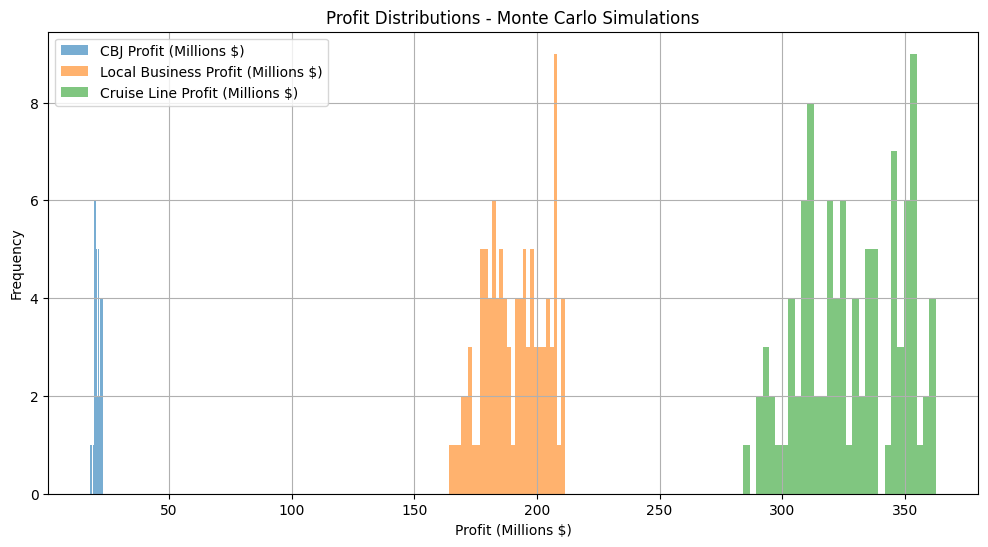

In [12]:
# ✅ **Visualization: Profit Distributions**
plt.figure(figsize=(12, 6))
plt.hist(results_df['CBJ_Profit'], bins=30, alpha=0.6, label='CBJ Profit (Millions $)')
plt.hist(results_df['Local_Business_Profit'], bins=30, alpha=0.6, label='Local Business Profit (Millions $)')
plt.hist(results_df['Cruise_Line_Profit'], bins=30, alpha=0.6, label='Cruise Line Profit (Millions $)')
plt.legend()
plt.title('Profit Distributions - Monte Carlo Simulations')
plt.xlabel('Profit (Millions $)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

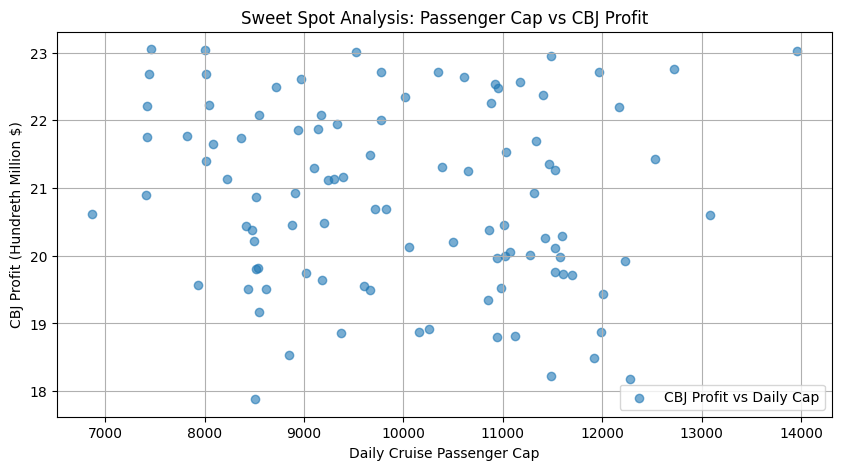

In [13]:
# Sweet Spot Analysis - Plot Daily Cap vs CBJ Profit
plt.figure(figsize=(10, 5))
plt.scatter(results_df['Optimal_Daily_Cap'], results_df['CBJ_Profit'], alpha=0.6, label='CBJ Profit vs Daily Cap')
plt.title('Sweet Spot Analysis: Passenger Cap vs CBJ Profit')
plt.xlabel('Daily Cruise Passenger Cap')
plt.ylabel('CBJ Profit (Hundreth Million $)')
plt.grid(True)
plt.legend()
plt.show()

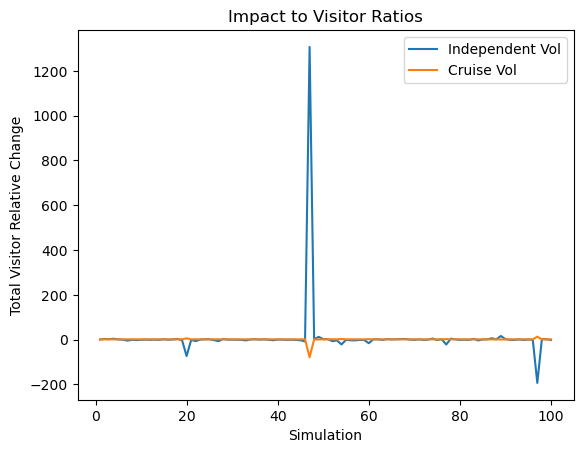

In [5]:
x = perc_change_df['Simulation']
a = perc_change_df['Ind_Vol_Change']/perc_change_df['Visitor_Change']
b = perc_change_df['Cruise_Vol_Change']/perc_change_df['Visitor_Change']

#plt.figure(figsize = (12, 6))
plt.plot(x, a, label = 'Independent Vol')
plt.plot(x, b, label = 'Cruise Vol')
plt.xlabel('Simulation')
plt.ylabel('Total Visitor Relative Change')
plt.title('Impact to Visitor Ratios')
plt.legend()

plt.show()

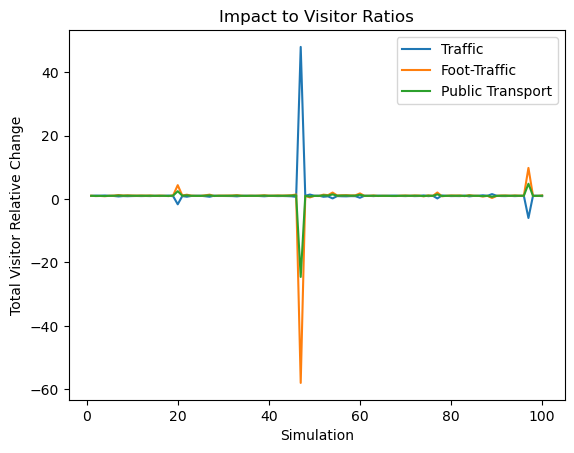

In [7]:
x = perc_change_df['Simulation']
y = perc_change_df['Traffic_Impact']/perc_change_df['Visitor_Change']
z = perc_change_df['Foot-traffic_Impact']/perc_change_df['Visitor_Change']
w = perc_change_df['Bus_Impact']/perc_change_df['Visitor_Change']

#plt.figure(figsize = (12, 6))
plt.plot(x, y, label = 'Traffic')
plt.plot(x, z, label = 'Foot-Traffic')
plt.plot(x, w, label = 'Public Transport')
#plt.plot(x, v, label = '

plt.xlabel('Simulation')
plt.ylabel('Total Visitor Relative Change')
plt.title('Impact to Visitor Ratios')
plt.legend()

plt.show()

In [8]:
#Simulation Investigatiion
i=28 #Simulation #1 to investigate
j=26 #Simulation #2 to investigate (compare)
print("Simulation                       #     ",perc_change_df['Simulation'][i-1],"|",perc_change_df['Simulation'][j-1])
print("Change in Total Visitors         = ",round(perc_change_df['Visitor_Change'][i-1],3)*100,"%"," |",round((perc_change_df['Visitor_Change'][j-1])*100,3),"%")
print("Traffic / Total Change           =", round(((perc_change_df['Traffic_Impact'][i-1]/perc_change_df['Visitor_Change'][i-1])-1)*100,3),"%","|",round((perc_change_df['Traffic_Impact'][j-1]/perc_change_df['Visitor_Change'][j-1])-1,3)*100,"%")
print("Bus / Total Change               =", round(((perc_change_df['Bus_Impact'][i-1]/perc_change_df['Visitor_Change'][i-1])-1),3)*100,"%","|",round((perc_change_df['Bus_Impact'][j-1]/perc_change_df['Visitor_Change'][j-1])-1,3)*100,"%")
print("Foot-traffic / Total Change      =", round((perc_change_df['Foot-traffic_Impact'][i-1]/perc_change_df['Visitor_Change'][i-1])-1,3)*100,"%","|",round((perc_change_df['Foot-traffic_Impact'][j-1]/perc_change_df['Visitor_Change'][j-1])-1,3)*100,"%")

print("Cruise Vol Change / Total Change =", round(((perc_change_df['Cruise_Vol_Change'][i-1]/perc_change_df['Visitor_Change'][i-1])-1)*100,3),"%","|",round(((perc_change_df['Cruise_Vol_Change'][j-1]/perc_change_df['Visitor_Change'][j-1])-1)*100,3),"%")
print("Ind Vol Change / Total Change    =", round(((perc_change_df['Ind_Vol_Change'][i-1]/perc_change_df['Visitor_Change'][i-1])-1)*100,3),"%","|",round(((perc_change_df['Ind_Vol_Change'][j-1]/perc_change_df['Visitor_Change'][j-1])-1)*100,3),"%")
print("Cruise Vol Makeup                =", round((counts_df['Cruise_Makeup'][i-1]),4),"|",round((counts_df['Cruise_Makeup'][j-1]),4))
print("Cruise Vol Makeup                =", round((counts_df['Ind_Makeup'][i-1]),4),"|",round((counts_df['Ind_Makeup'][j-1]),4))

Simulation                       #      28 | 26
Change in Total Visitors         =  10.4 %  | -14.737 %
Traffic / Total Change           = 5.13 % | -12.1 %
Bus / Total Change               = -2.8000000000000003 % | 6.6000000000000005 %
Foot-traffic / Total Change      = -6.4 % | 15.2 %
Cruise Vol Change / Total Change = -8.727 % | 20.538 %
Ind Vol Change / Total Change    = 142.804 % | -336.076 %
Cruise Vol Makeup                = 0.9347 | 0.909
Cruise Vol Makeup                = 0.0653 | 0.091


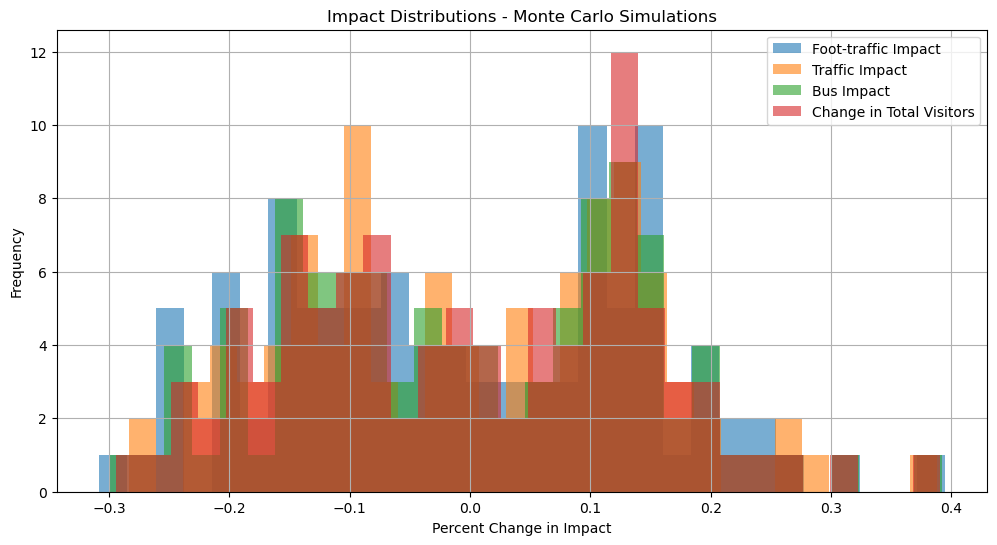

In [9]:
# Impact Visualization
plt.figure(figsize=(12, 6))
plt.hist(perc_change_df['Foot-traffic_Impact'], bins=30, alpha=0.6, label='Foot-traffic Impact')
plt.hist(perc_change_df['Traffic_Impact'], bins=30, alpha=0.6, label='Traffic Impact')
plt.hist(perc_change_df['Bus_Impact'], bins=30, alpha=0.6, label='Bus Impact')
plt.hist(perc_change_df['Visitor_Change'], bins=30, alpha=0.6, label='Change in Total Visitors')
plt.legend()
plt.title('Impact Distributions - Monte Carlo Simulations')
plt.xlabel('Percent Change in Impact')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

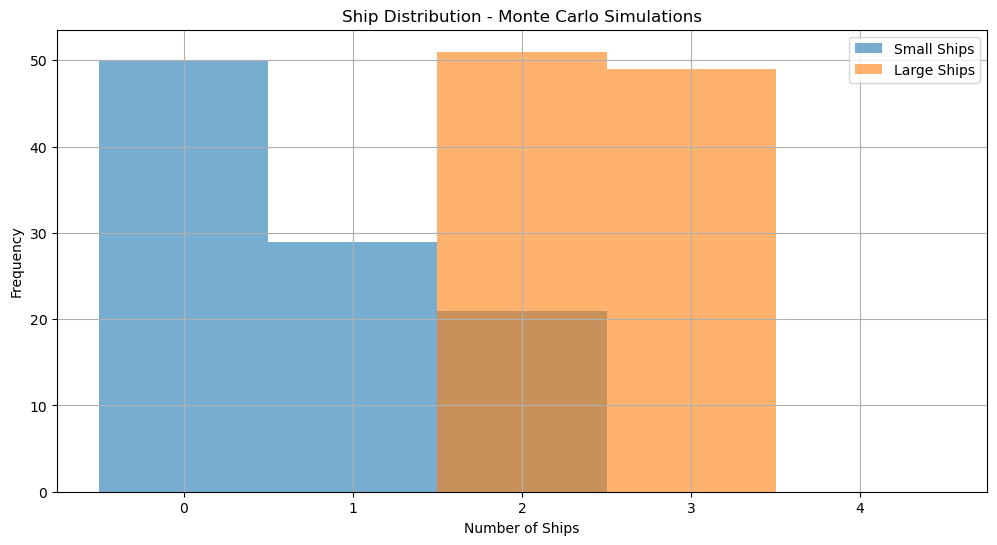

In [10]:
a = Enviro_df['Large Ships']
b = Enviro_df['Small Ships']

plt.figure(figsize=(12, 6))
plt.hist(b, range=(0,5), bins=5,alpha=0.6, label='Small Ships',align='left')
plt.hist(a, range=(0,5), bins=5,alpha=0.6, label='Large Ships',align='left')
plt.legend()
plt.title('Ship Distribution - Monte Carlo Simulations')
plt.xlabel('Number of Ships')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

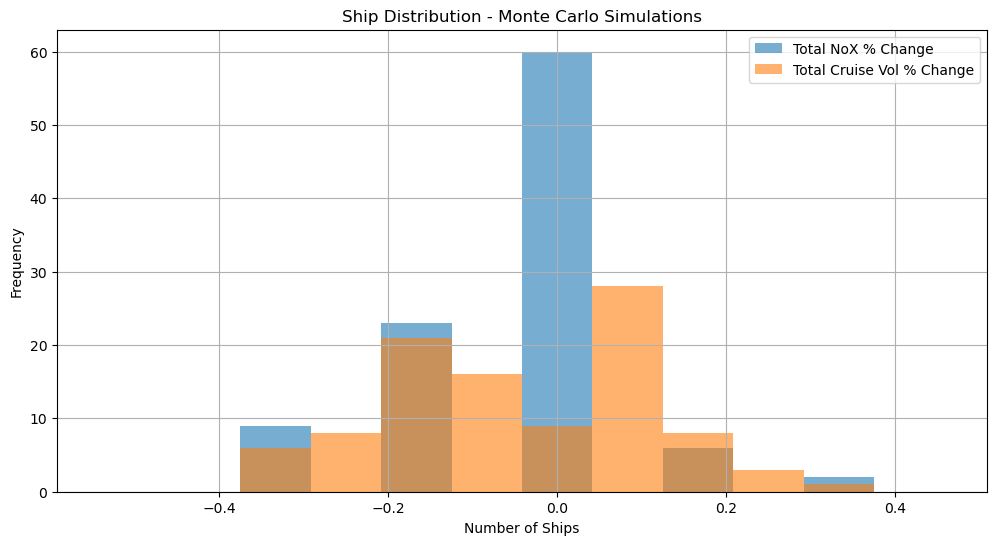

In [23]:
a = perc_change_df['Cruise_Vol_Change']
c = Enviro_df[ 'NoX Change']

plt.figure(figsize=(12, 6))
plt.hist(c,range=(-.5,.5),bins=12,alpha=0.6, label='Total NoX % Change',align='left')
plt.hist(a,range=(-.5,.5),bins=12,alpha=0.6, label='Total Cruise Vol % Change',align='left')
plt.legend()
plt.title('Ship Distribution - Monte Carlo Simulations')
plt.xlabel('Number of Ships')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()